In [2]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
start = datetime.datetime(2021,10,4)
end =datetime.datetime(2022,10,4)

In [4]:
BTC = web.DataReader('BTC-USD', 'yahoo', start, end)
ETH = web.DataReader('ETH-USD', 'yahoo', start, end)
USDT = web.DataReader('USDT-USD', 'yahoo', start, end) 
BNB = web.DataReader('BNB-USD', 'yahoo', start, end)
print(BTC,ETH,USDT,BNB)

                    High           Low          Open         Close  \
Date                                                                 
2021-10-04  49456.777344  47045.003906  48208.906250  49112.902344   
2021-10-05  51839.984375  49072.839844  49174.960938  51514.812500   
2021-10-06  55568.464844  50488.191406  51486.664062  55361.449219   
2021-10-07  55338.625000  53525.468750  55338.625000  53805.984375   
2021-10-08  55922.980469  53688.054688  53802.144531  53967.847656   
...                  ...           ...           ...           ...   
2022-10-01  19471.154297  19231.082031  19431.105469  19312.095703   
2022-10-02  19370.308594  18970.621094  19311.849609  19044.107422   
2022-10-03  19653.542969  19025.226562  19044.068359  19623.580078   
2022-10-04  20380.343750  19523.839844  19623.583984  20336.843750   
2022-10-05  20343.748047  19801.800781  20335.900391  20160.716797   

                 Volume     Adj Close  
Date                                   
2021-10-0

In [5]:
stocks = pd.concat([BTC['Adj Close'], ETH['Adj Close'], USDT['Adj Close'], BNB['Adj Close']],axis=1)
stocks.columns = ['BTC', 'ETH', 'USDT', 'BNB'] 
stocks

,BTC,ETH,USDT,BNB
Date,,,,
2021-10-04,49112.902344,3380.089111,0.999838,425.748901
2021-10-05,51514.812500,3518.518555,1.000440,442.706146
2021-10-06,55361.449219,3580.562012,1.000317,435.401367
2021-10-07,53805.984375,3587.974854,1.000375,438.761749
2021-10-08,53967.847656,3563.759277,1.000116,419.102051
...,...,...,...,...
2022-10-01,19312.095703,1311.644409,1.000043,282.871918
2022-10-02,19044.107422,1276.093506,1.000060,284.433105
2022-10-03,19623.580078,1323.439209,1.000089,287.031982


In [6]:
#RETURNS

returns = stocks.shift(1)/stocks
returns

,BTC,ETH,USDT,BNB
Date,,,,
2021-10-04,NaN,NaN,NaN,NaN
2021-10-05,0.953374,0.960657,0.999398,0.961696
2021-10-06,0.930518,0.982672,1.000123,1.016777
2021-10-07,1.028909,0.997934,0.999942,0.992341
2021-10-08,0.997001,1.006795,1.000259,1.046909
...,...,...,...,...
2022-10-01,1.006198,1.012453,1.000006,1.004668
2022-10-02,1.014072,1.027859,0.999983,0.994511
2022-10-03,0.970471,0.964225,0.999971,0.990946


In [7]:
#LOGARITMIC RETURNS

logReturns = np.log(returns)*250
logReturns

,BTC,ETH,USDT,BNB
Date,,,,
2021-10-04,NaN,NaN,NaN,NaN
2021-10-05,-11.936903,-10.034491,-0.150481,-9.764121
2021-10-06,-18.003525,-4.369935,0.030744,4.159484
2021-10-07,7.124699,-0.517040,-0.014509,-1.922066
2021-10-08,-0.750940,1.692993,0.064745,11.460526
...,...,...,...,...
2022-10-01,1.544679,3.094085,0.001490,1.164221
2022-10-02,3.493472,6.869540,-0.004232,-1.375972
2022-10-03,-7.493544,-9.107587,-0.007271,-2.273888


In [8]:
a = 10000

weight = np.zeros((a, 4))
expectedReturn = np.zeros(a)
expectedVolatility = np.zeros(a)
sharpeRatio = np.zeros(a)

meanlogReturns = logReturns.mean()
Sigma = logReturns.cov()
for k in range(a):
    w = np.array(np.random.random(4))
    w = w / np.sum(w)
    weight[k,:] = w
    
    expectedReturn[k] = np.sum(meanlogReturns * w)
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]

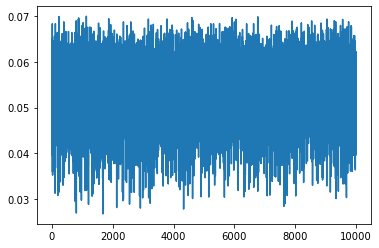

In [9]:
plt.plot(sharpeRatio)

In [10]:
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([0.47932558, 0.00792624, 0.50803831, 0.00470988])

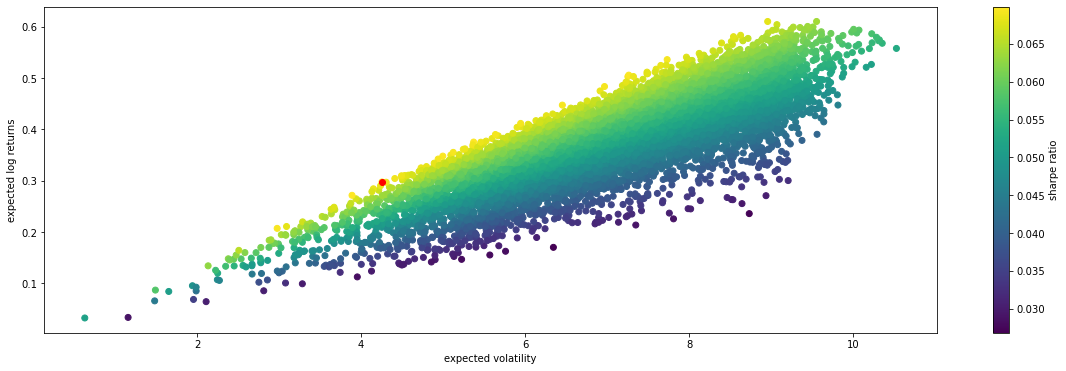

In [11]:
plt.figure(figsize=(20,6))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.show()

In [13]:
def negativeSR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    SR = R/V
    return -1*SR

def b(w):
    return np.sum(w)-1

w0 = [0.25, 0.25, 0.25, 0.25] 
bounds = ((0,1), (0,1), (0,1), (0,1))
constraints = ({'type': 'eq', 'fun': b})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)
w_opt

     fun: -0.07041744102401398
     jac: array([-3.88203189e-05,  7.94474129e-03,  1.24228187e-04,  4.28425260e-02])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([7.61906395e-01, 1.94289029e-16, 2.38093605e-01, 0.00000000e+00])

In [14]:
w_opt.x

array([7.61906395e-01, 1.94289029e-16, 2.38093605e-01, 0.00000000e+00])

In [16]:
returns = np.linspace(0, 0.7, 50)
volatility_opt = []

def GR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    return R

def minimizeMyvolatility(w):
    w =np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
    return V
for R in returns:
    opt = minimize(minimizeMyvolatility, w0, method = 'SLSQP', bounds = bounds, constraints = constraints)
    constraints = ({'type': 'eq', 'fun': b},
                   {'type': 'eq', 'fun': lambda w: GR(w) - R})

volatility_opt.append(opt['fun'])

In [17]:
volatility_opt

[11.08802673696132]

ValueError: x and y must have same first dimension, but have shapes (1,) and (50,)

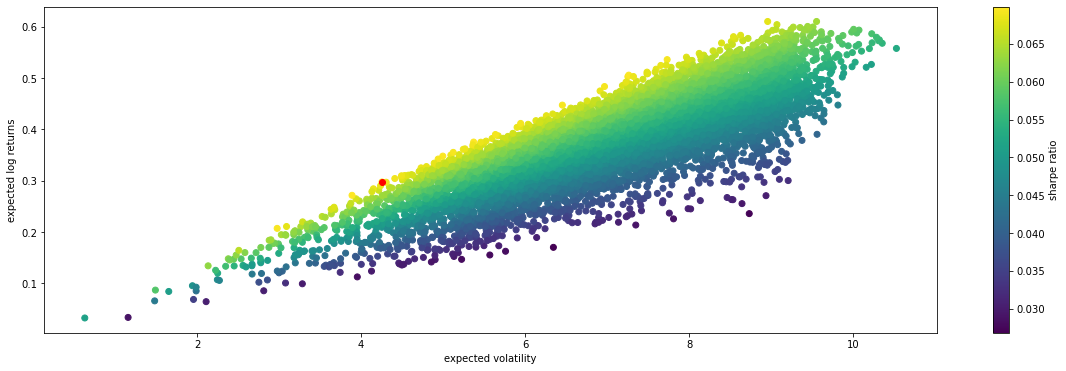

In [18]:
plt.figure(figsize=(20,6))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.plot(volatility_opt,returns, '--')
plt.show()